## Delving into non-parametric methods using pandas and scipy

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
sns.set_style("whitegrid")

### The Spearman Rank Correlation

The Spearman Rank Correlation is a non-parametric measure of statistical dependence between two variables. It assesses how well the relationship between two variables can be described using a monotonic function. Unlike the Pearson correlation, the Spearman correlation
does not assume that both variables are normally distributed. Instead, it works by comparing the ranked values of the two variables.

In [3]:
address = '../data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


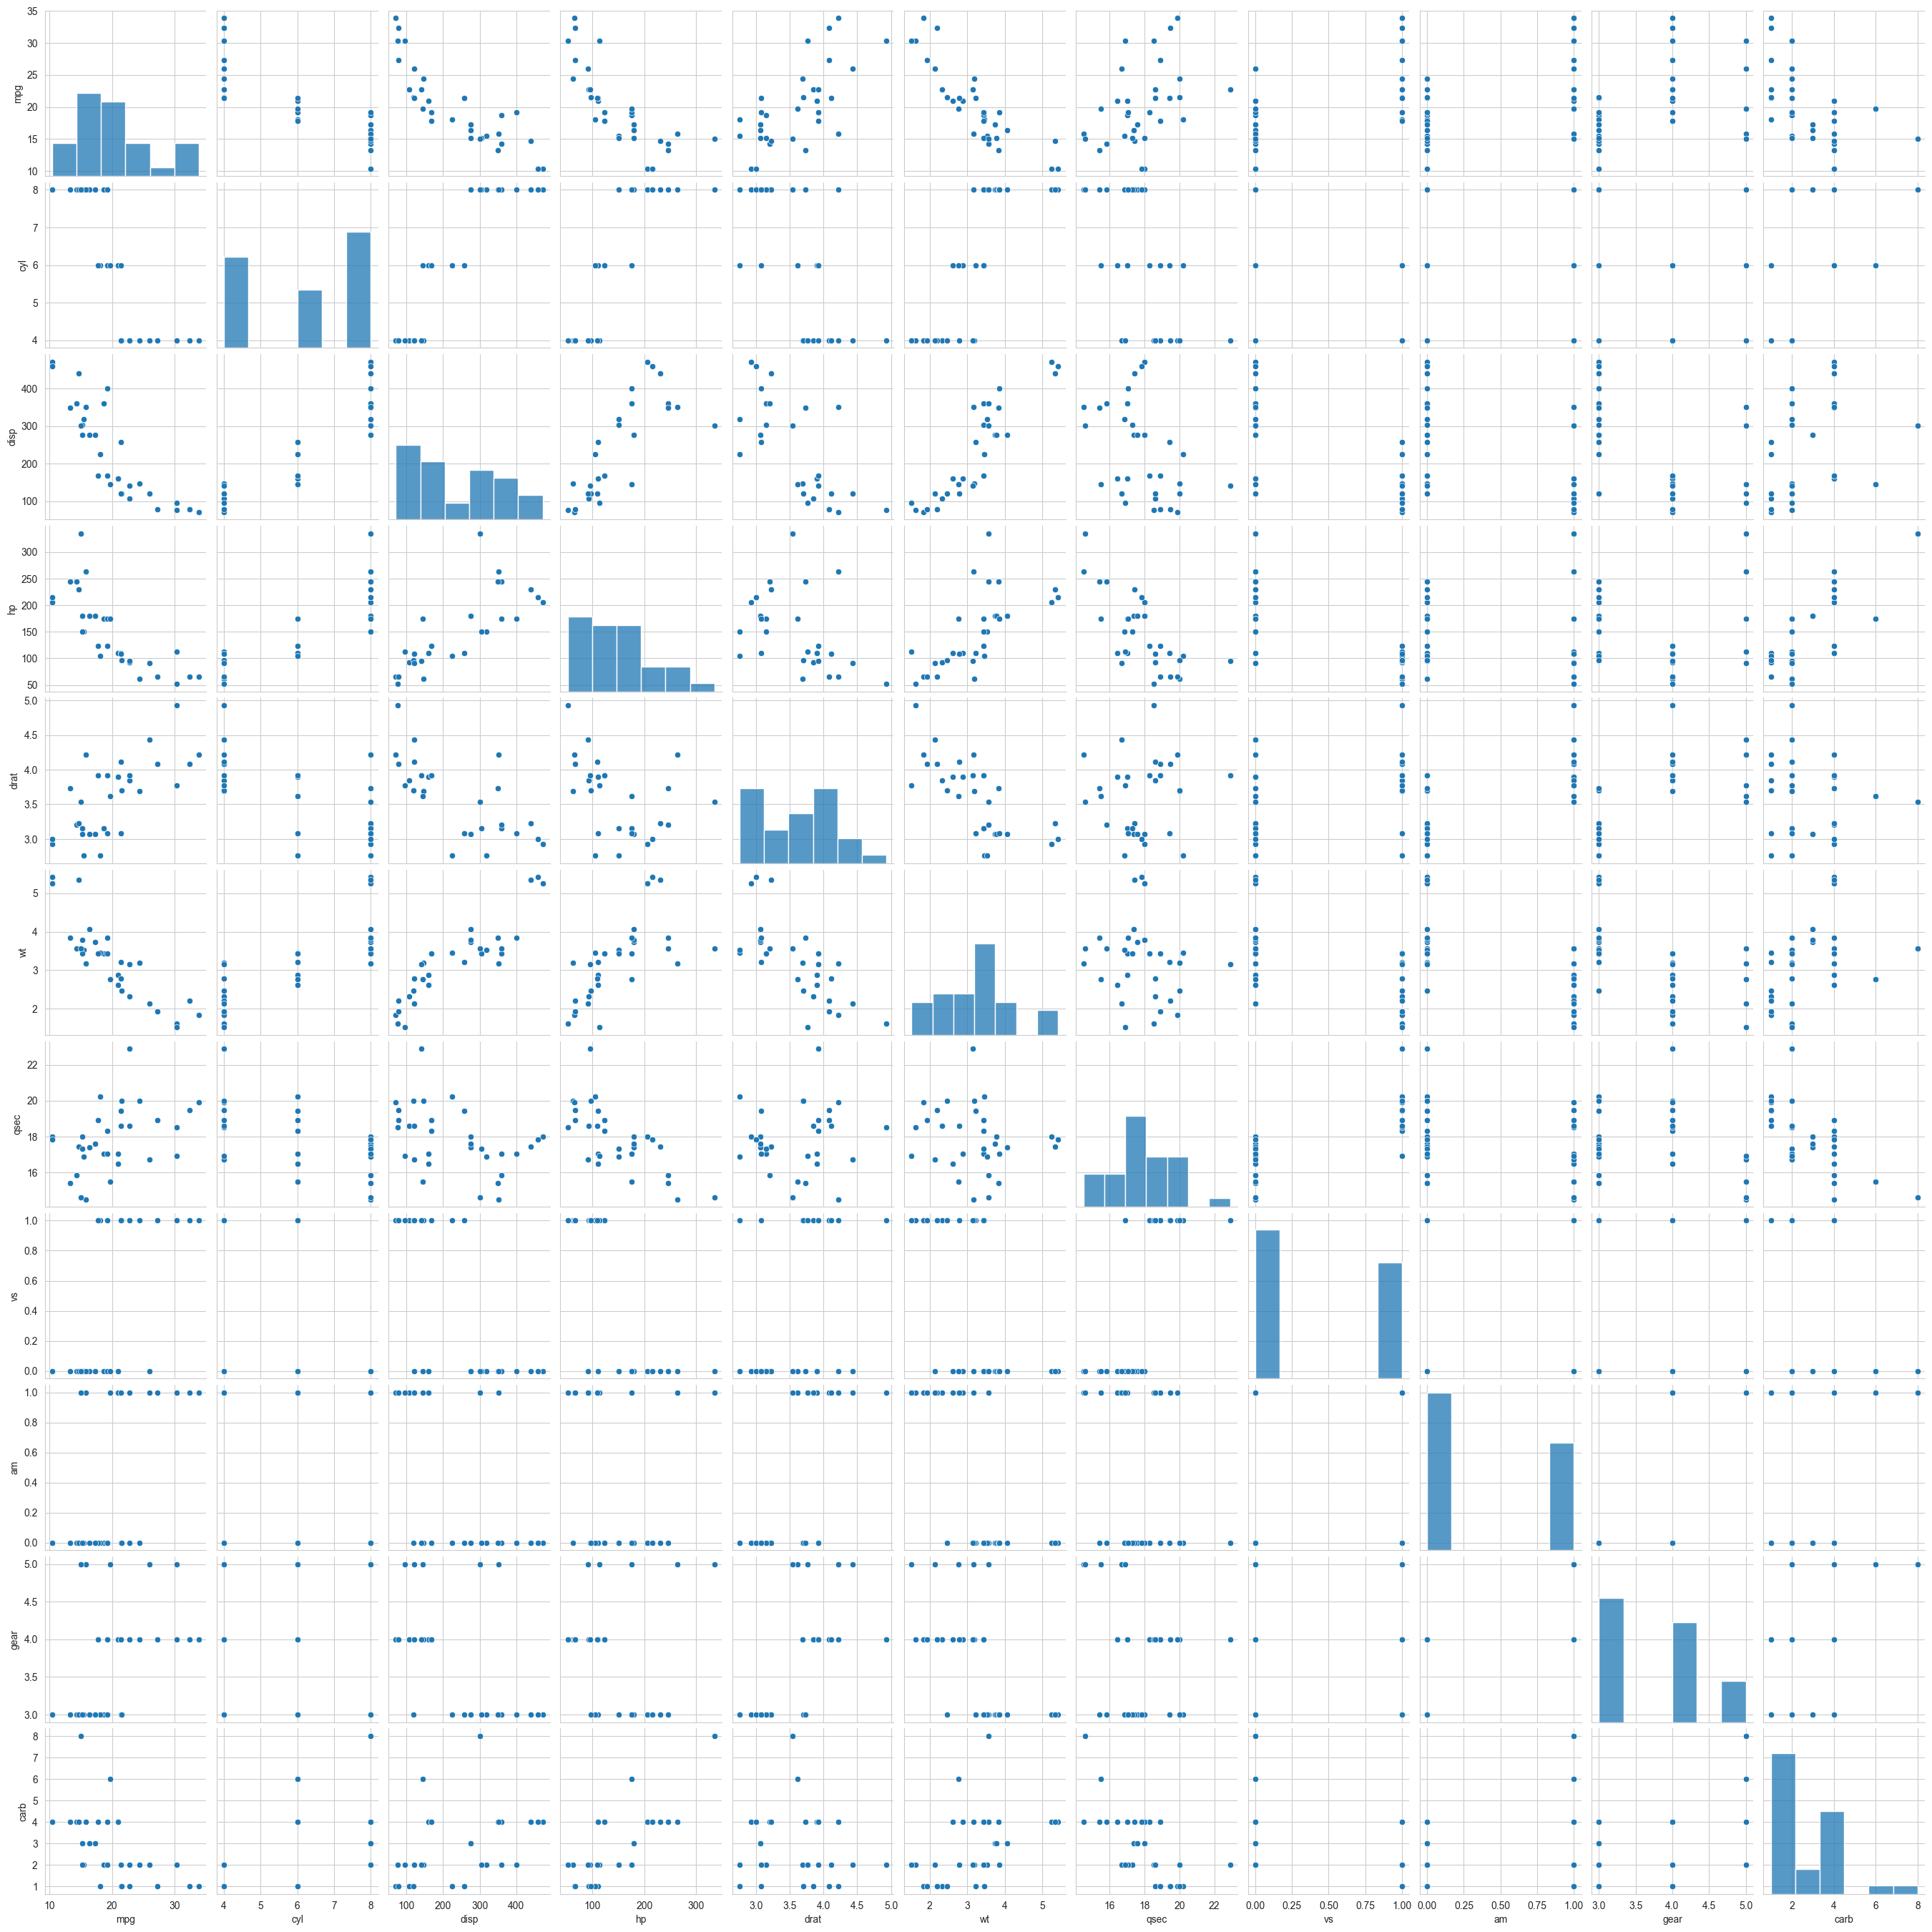

In [4]:
sns.pairplot(cars)

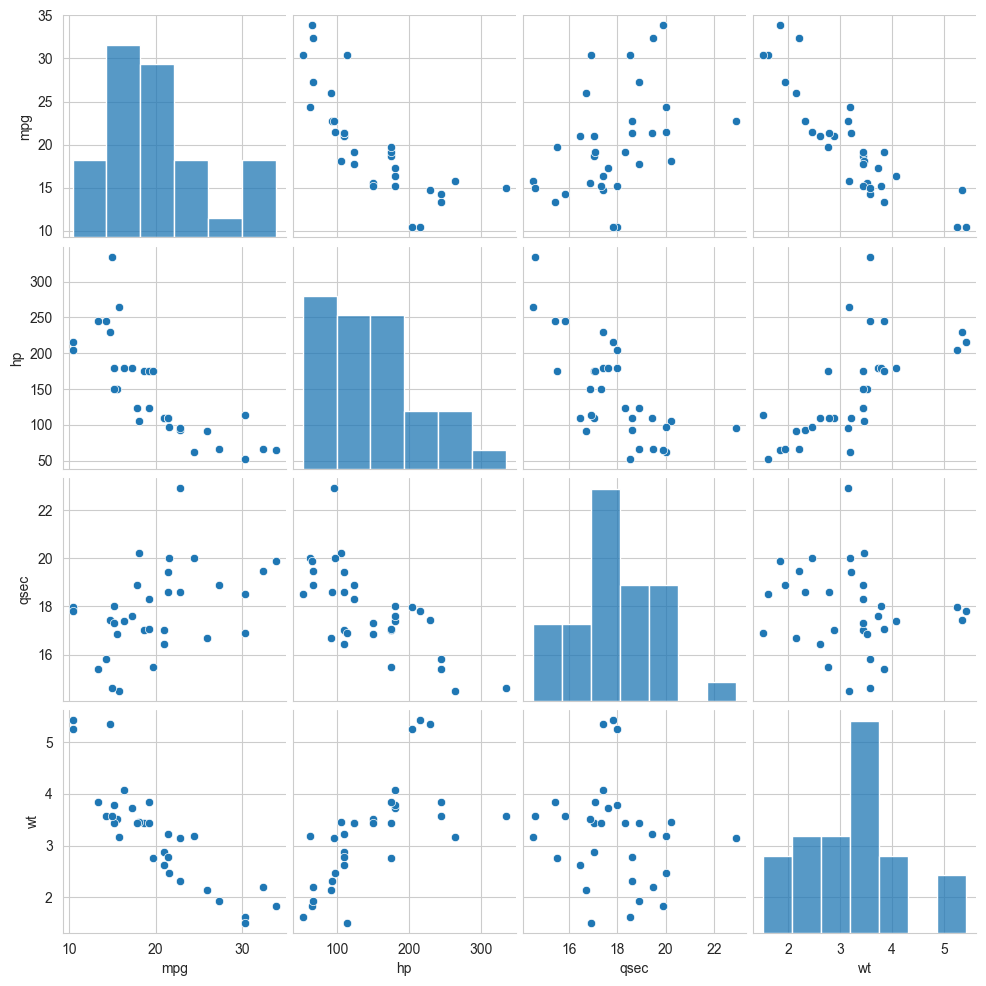

In [5]:
x = cars[['mpg', 'hp', 'qsec', 'wt']]
sns.pairplot(x)

In [8]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
# The Spearman Rank Correlation Coefficient is -0.852, which indicates that there is a strong negative relationship between the two variables.

Spearman Rank Correlation Coefficient -0.814


In [9]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
# The Spearman Rank Correlation Coefficient is -0.522, which indicates that there is a moderate negative relationship between the two variables.

Spearman Rank Correlation Coefficient -0.522


In [10]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
# The Spearman Rank Correlation Coefficient is -0.564, which indicates that there is a moderate negative relationship between the two variables.

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

The Chi-square test for independence is a statistical test used to determine whether there is a significant association between two categorical variables. It is based on the difference between the expected frequencies and the observed frequencies in one or more categories in the contingency table.

p < 0.05: The two categorical variables are dependent. reject the null hypothesis, and conclude that there is a significant association between the variables.

p > 0.05: The two categorical variables are independent. accept the null hypothesis, and conclude that there is no significant association between the variables.

In [ ]:
table = pd.crosstab(cyl, am)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
# The Chi-square Statistic is 8.741 and the p-value is 0.013, which indicates that there is a relationship between the two variables.

Chi-square Statistic 8.741 p_value 0.013


In [12]:
table = pd.crosstab(cars['cyl'], cars['vs'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
# The Chi-square Statistic is 21.340 and the p-value is 0.000, which indicates that there is a relationship between the two variables.

Chi-square Statistic 21.340 p_value 0.000


In [13]:
table = pd.crosstab(cars['cyl'], cars['gear'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
# The Chi-square Statistic is 18.036 and the p-value is 0.001, which indicates that there is a relationship between the two variables.

Chi-square Statistic 18.036 p_value 0.001
